In [1]:
#3. TRAIN CUSTOM MODEL USING SCIKIT LEARN
#READ IN COLLECTED DATA AND PROCESS
#Manejamos pandas para los datos tabulados
import pandas as pd
#para divir los datos de entrenamiento y los de prueba
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
#Importando los datos de nuestro dataset 
df=pd.read_csv('myvideo/poses.csv')
df.head()

,class,NOSE_x1,NOSE_y1,NOSE_z1,NOSE_v1,LEFT_EYE_INNER_x2,LEFT_EYE_INNER_y2,LEFT_EYE_INNER_z2,LEFT_EYE_INNER_v2,LEFT_EYE_x3,...,RIGHT_HEEL_z31,RIGHT_HEEL_v31,LEFT_FOOT_INDEX_x32,LEFT_FOOT_INDEX_y32,LEFT_FOOT_INDEX_z32,LEFT_FOOT_INDEX_v32,RIGHT_FOOT_INDEX_x33,RIGHT_FOOT_INDEX_y33,RIGHT_FOOT_INDEX_z33,RIGHT_FOOT_INDEX_v33
0,Mabu,0.338949,0.267868,-0.192381,0.999615,0.338756,0.255450,-0.176463,0.998945,0.339873,...,-0.020487,0.909678,0.404543,0.637727,0.067369,0.985126,0.245939,0.678501,-0.097650,0.986881
1,Mabu,0.341362,0.272906,-0.172833,0.999878,0.341833,0.263022,-0.157755,0.999648,0.342892,...,-0.019190,0.903474,0.403932,0.632878,0.042807,0.983703,0.245826,0.677713,-0.090687,0.986446
2,Mabu,0.343300,0.273654,-0.145198,0.999949,0.343889,0.264594,-0.129308,0.999866,0.345471,...,-0.017373,0.907558,0.402237,0.634145,0.046420,0.964670,0.245234,0.675632,-0.082495,0.982250
3,Mabu,0.341744,0.275978,-0.036437,1.000000,0.344508,0.270824,-0.024877,0.999999,0.346587,...,0.001984,0.491569,0.401018,0.631583,0.017119,0.583191,0.246674,0.672462,-0.047516,0.739743
4,Mabu,0.344600,0.279687,-0.137207,0.999933,0.345614,0.269513,-0.122338,0.999876,0.347535,...,-0.019327,0.955203,0.403115,0.635911,0.015902,0.975587,0.243256,0.677595,-0.082133,0.988185


In [3]:
# label_encoder object
label_encoder =LabelEncoder()
# Encode labels in column. 
df['class']= label_encoder.fit_transform(df['class'])
df.head()


,class,NOSE_x1,NOSE_y1,NOSE_z1,NOSE_v1,LEFT_EYE_INNER_x2,LEFT_EYE_INNER_y2,LEFT_EYE_INNER_z2,LEFT_EYE_INNER_v2,LEFT_EYE_x3,...,RIGHT_HEEL_z31,RIGHT_HEEL_v31,LEFT_FOOT_INDEX_x32,LEFT_FOOT_INDEX_y32,LEFT_FOOT_INDEX_z32,LEFT_FOOT_INDEX_v32,RIGHT_FOOT_INDEX_x33,RIGHT_FOOT_INDEX_y33,RIGHT_FOOT_INDEX_z33,RIGHT_FOOT_INDEX_v33
0,2,0.338949,0.267868,-0.192381,0.999615,0.338756,0.255450,-0.176463,0.998945,0.339873,...,-0.020487,0.909678,0.404543,0.637727,0.067369,0.985126,0.245939,0.678501,-0.097650,0.986881
1,2,0.341362,0.272906,-0.172833,0.999878,0.341833,0.263022,-0.157755,0.999648,0.342892,...,-0.019190,0.903474,0.403932,0.632878,0.042807,0.983703,0.245826,0.677713,-0.090687,0.986446
2,2,0.343300,0.273654,-0.145198,0.999949,0.343889,0.264594,-0.129308,0.999866,0.345471,...,-0.017373,0.907558,0.402237,0.634145,0.046420,0.964670,0.245234,0.675632,-0.082495,0.982250
3,2,0.341744,0.275978,-0.036437,1.000000,0.344508,0.270824,-0.024877,0.999999,0.346587,...,0.001984,0.491569,0.401018,0.631583,0.017119,0.583191,0.246674,0.672462,-0.047516,0.739743
4,2,0.344600,0.279687,-0.137207,0.999933,0.345614,0.269513,-0.122338,0.999876,0.347535,...,-0.019327,0.955203,0.403115,0.635911,0.015902,0.975587,0.243256,0.677595,-0.082133,0.988185


In [4]:

X=df.drop('class',axis=1)#features
y=df['class']#target value

In [5]:
#Esa parte es solo extraer los datos que nuestra diviison de prueba 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

In [6]:
#Estas dirigidos a una canalizacion o a generar a pipeline de aprendizaje
#automatico, esta configuracion se usara tanto para el entrenamiento como test
from sklearn.pipeline import make_pipeline
#Normaliza los datos, resta los datos y los divide por la desv estandar
from sklearn.preprocessing import StandardScaler
#Estos son algoritmos de clasificacion se usara 4 para clasificar
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [7]:
#hay que pensar que cada uno es como un modelo individual
pipelines={
    'lr':make_pipeline(StandardScaler(),LogisticRegression()),
    'rc':make_pipeline(StandardScaler(),RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(),RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(),GradientBoostingClassifier()),  
    
}

In [8]:
fit_models={}
#estamos recorriendo cada uno de nuestros pipelines
for algo, pipeline in pipelines.items():
    #hacemos el ajuste de puntos para entrenar bien
    #se almacenara en una variable modelo y se lo guardara
    #en nuestro diccionario
    model=pipeline.fit(X_train, y_train)
    fit_models[algo]=model

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
#Prueba de prediccion
fit_models['rf'].predict(X_test)

array([1, 1, 1, 5, 2, 1, 0, 3, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 4, 3, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 5, 2, 1, 2, 3, 0,
       2, 1, 2, 2, 2, 1, 1, 1, 3, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1,
       1, 5, 1, 0, 4, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 0, 4, 1, 2, 1, 1, 1,
       4, 3, 2, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 3, 1, 1,
       5, 2, 0, 4, 0, 2, 2, 1, 1, 2, 1, 1, 2, 2, 4, 4, 1, 3, 0, 1, 1, 3,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 4, 0, 2, 1, 5, 2, 1, 2, 4, 0, 2, 2,
       2, 1, 4, 1, 1, 3, 2, 4, 1, 4, 1, 1, 3, 1, 1, 2, 0, 1, 1, 5, 2, 3,
       3, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 3, 4, 1, 2, 0, 2, 2, 1, 0, 2, 2,
       2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 4, 5, 4, 5, 0, 1, 1, 3, 1, 2, 1, 2,
       1, 4, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 3, 1, 4, 3, 1, 0,
       5, 1, 2, 2, 1, 3, 3, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 4, 1,
       1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 3, 2,
       5, 2, 1, 2, 4, 3, 2, 0, 2, 5, 2, 1])

In [10]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
#pickle es una libreria que se utiliza para guardar los modelos en el disco
import pickle

In [11]:
#--------------PRECISION 
#recorremos cada modelo del diccionario enviandole el X_test
#para que hagan predicciones y se almacena los resultados dentro de
#una variable llamada yhat
for algo,model in fit_models.items():
    yhat=model.predict(X_test)
    print(algo, precision_score(y_test,yhat, average="macro"))

lr 0.965863997113997
rc 0.9646863553113553
rf 0.9933993399339934
gb 0.9951862100772512


In [12]:
#--------------RECALL
#recorremos cada modelo del diccionario enviandole el X_test
#para que hagan predicciones y se almacena los resultados dentro de
#una variable llamada yhat
for algo,model in fit_models.items():
    yhat=model.predict(X_test)
    print(algo, recall_score(y_test,yhat, average="macro"))

lr 0.9836871687343468
rc 0.9868178111712971
rf 0.9874293785310734
gb 0.9885360242297163


In [13]:
#--------------ACCURACY
#recorremos cada modelo del diccionario enviandole el X_test
#para que hagan predicciones y se almacena los resultados dentro de
#una variable llamada yhat
for algo,model in fit_models.items():
    yhat=model.predict(X_test)
    print(algo, accuracy_score(y_test,yhat))

lr 0.9798657718120806
rc 0.9865771812080537
rf 0.9865771812080537
gb 0.9899328859060402


In [14]:
#--------------f1-score
#recorremos cada modelo del diccionario enviandole el X_test
#para que hagan predicciones y se almacena los resultados dentro de
#una variable llamada yhat
for algo,model in fit_models.items():
    yhat=model.predict(X_test)
    print(algo, f1_score(y_test,yhat, average="macro"))

lr 0.9743196527601937
rc 0.9744726727539148
rf 0.9902135696127111
gb 0.991749963783862


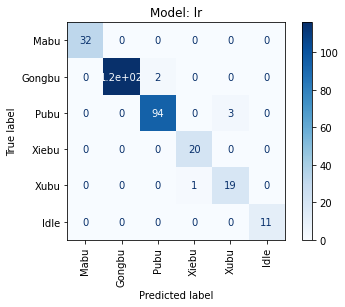

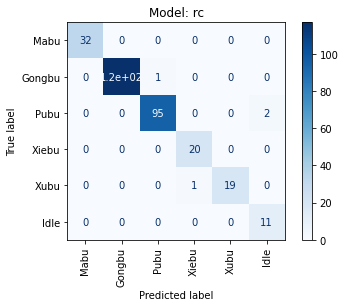

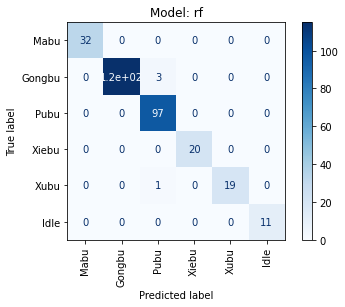

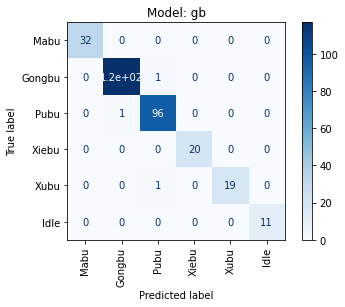

In [18]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
#--------------PRECISION 
#recorremos cada modelo del diccionario enviandole el X_test
#para que hagan predicciones y se almacena los resultados dentro de
#una variable llamada yhat
for algo,model in fit_models.items():
    #yhat=model.predict(X_test)
    #print(algo, precision_score(y_test,yhat, average="macro"))
    class_names = ['Mabu', 'Gongbu', 'Pubu', 'Xiebu','Xubu','Idle']
    disp = plot_confusion_matrix(model, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, xticks_rotation='vertical',)
    disp.ax_.set_title("Model: "+algo)

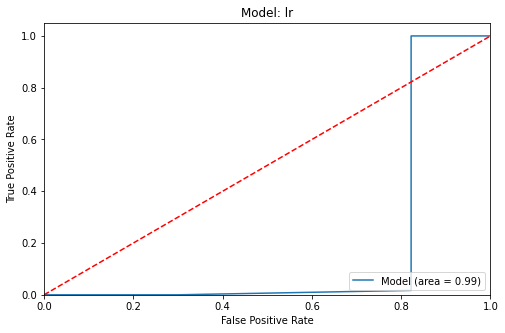

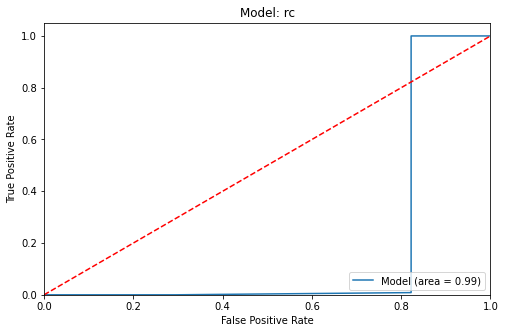

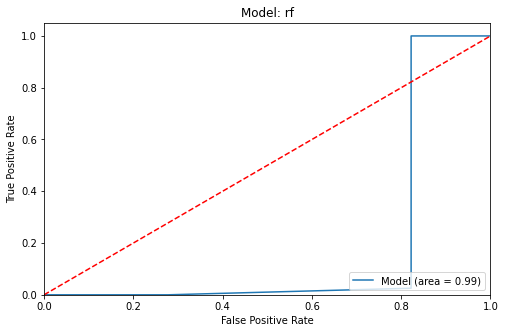

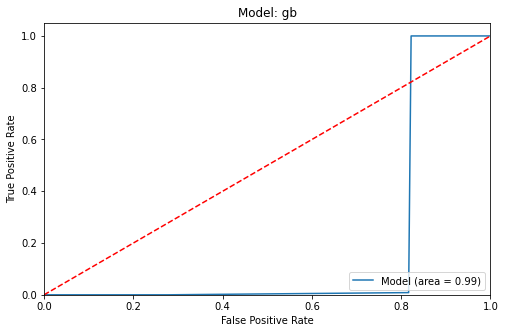

In [26]:
import pandas as pd 
from sklearn.preprocessing import label_binarize
#--------------ROC Analysis
#recorremos cada modelo del diccionario enviandole el X_test
#para que hagan predicciones y se almacena los resultados dentro de
#una variable llamada yhat
for algo,model in fit_models.items():
    yhat=model.predict(X_test)
    plot_roc_curve(y_test,yhat,algo)
    

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
def plot_roc_curve(y_test, y_pred,title):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    aucu = auc(fpr, tpr)
    roc_auc = roc_auc_score(y_test, pd.get_dummies(y_pred), multi_class="ovr")
    # plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc))
    plt.figure(figsize=(8,5))
    plt.plot(fpr, tpr, label='Model (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("Model: "+title)
    plt.legend(loc="lower right");
    plt.show();